In [14]:
import warnings
import itertools
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style('whitegrid')

In [15]:
df_choice = pd.read_csv('C:\\Users\\Dawn\\OneDrive\\Data Analytics Work\\Capstone Project 2\\multipleChoiceResponses.csv')

C:\Users\Dawn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
df_choice.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [17]:
print("Number of replies to the survey :", df_choice.shape[0])

Number of replies to the survey : 23860


# Storing the questions separately

In [18]:
question_names = df_choice.iloc[0]
df_choice = df_choice.drop(0, axis=0)

In [8]:
print(question_names['Q9'])

What is your current yearly compensation (approximate $USD)?


In [9]:
print(df_choice['Q9'].unique())

[nan '10-20,000' '0-10,000'
 'I do not wish to disclose my approximate yearly compensation'
 '20-30,000' '125-150,000' '30-40,000' '50-60,000' '100-125,000'
 '90-100,000' '70-80,000' '80-90,000' '60-70,000' '400-500,000'
 '40-50,000' '150-200,000' '500,000+' '300-400,000' '200-250,000'
 '250-300,000']


# Removing non-numerical values

In [20]:
df_choice = df_choice[df_choice['Q9'].notnull()]
df_choice = df_choice[df_choice['Q9'] != 'I do not wish to disclose my approximate yearly compensation']

In [21]:
print(df_choice.shape[0], "replies left")

15429 replies left


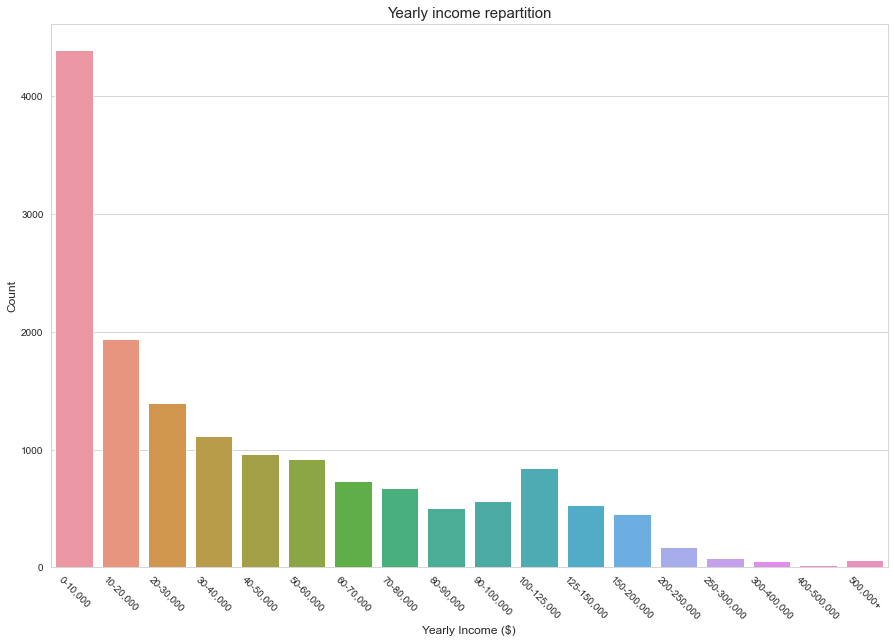

In [13]:
order = ['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000', 
  '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000', 
  '100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000', 
  '300-400,000', '400-500,000', '500,000+']

plt.figure(figsize=(15,10))
sns.countplot(df_choice['Q9'], order=order)
plt.xticks(rotation=-45)
plt.xlabel("Yearly Income ($)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Yearly income repartition", fontsize=15)
plt.show()

# we make the target numerical by taking the mean of the interval, for vizualisation purpose

In [22]:
dic = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000, 
       '40-50,000': 45000, '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000, 
       '80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500, 
       '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000, 
       '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000, 
       '500,000+':500000}

df_choice['target'] = df_choice['Q9'].apply(lambda x: dic[x])

# Removing the liars such as students that make half a million a year...

In [23]:
liars = df_choice[df_choice['Q6'] == "Student"]
liars = liars[liars['target'] >= 500000]

In [24]:
liars.head(10)

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,target
11146,1501,Male,-1,18-21,United States of America,Bachelor’s degree,"Information technology, networking, or system ...",Student,-1,I am a student,...,Too expensive,Too time-consuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,I had never considered making my work easier f...,NaN,NaN,-1,500000
15285,505,Male,-1,18-21,India,No formal education past high school,NaN,Student,-1,I am a student,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,500000
20576,197,Prefer to self-describe,65,25-29,Belgium,Master’s degree,"Computer science (software engineering, etc.)",Student,-1,I am a student,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,500000
20875,271,Male,-1,18-21,India,Bachelor’s degree,"Computer science (software engineering, etc.)",Student,-1,I am a student,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,500000


In [25]:
df_choice = df_choice[df_choice['target'] < 500000]

# Gender Breakdown

In [26]:
print(question_names['Q1'])

What is your gender? - Selected Choice


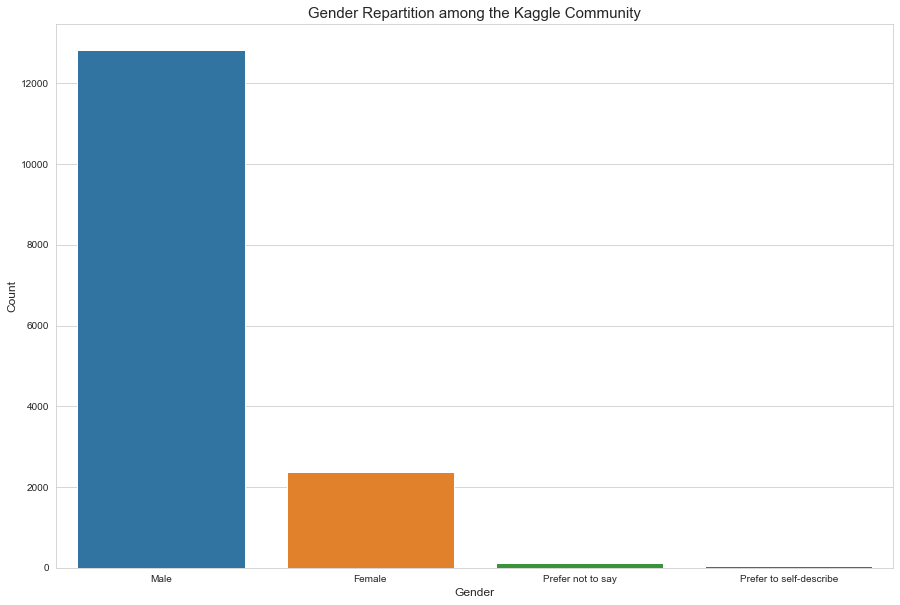

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(df_choice['Q1'])
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Gender Repartition among the Kaggle Community", fontsize=15)
plt.show()
plt.show()

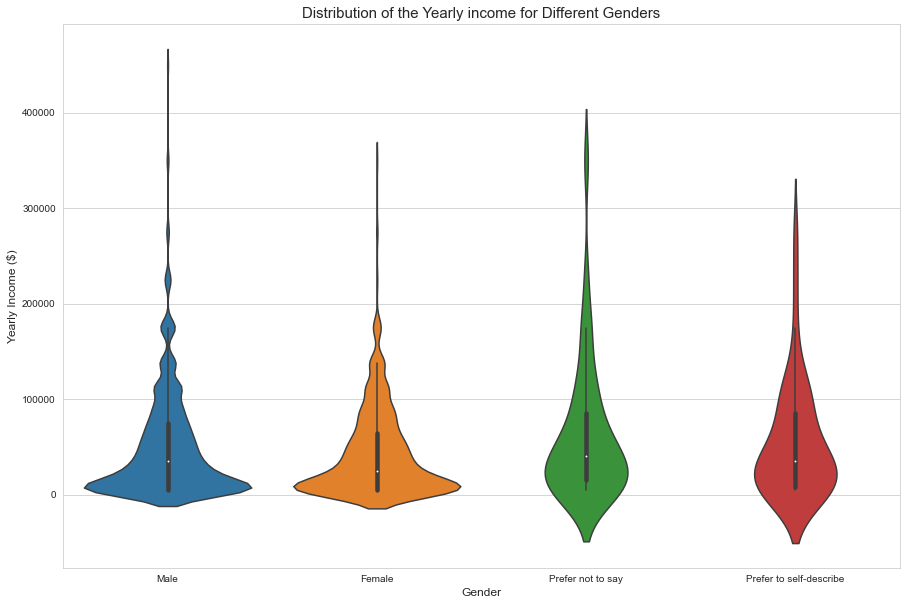

In [20]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q1', y='target', data=df_choice)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.title("Distribution of the Yearly income for Different Genders", fontsize=15)
plt.show()

## The distribution of male and female salaries is quite similar so far. The last 2 categories are too small to have a bearing on the big picture.

# Age

In [21]:
print(question_names['Q2'])

What is your age (# years)?


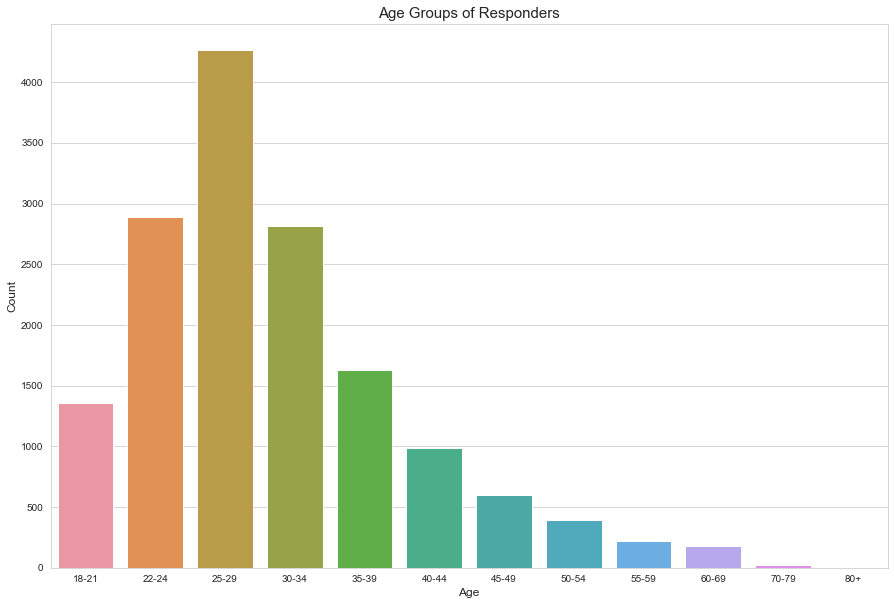

In [28]:
order = ['18-21', '22-24', '25-29', '30-34','35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70-79', '80+']
plt.figure(figsize=(15,10))
sns.countplot(df_choice['Q2'], order=order)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Age Groups of Responders", fontsize=15)
plt.show()

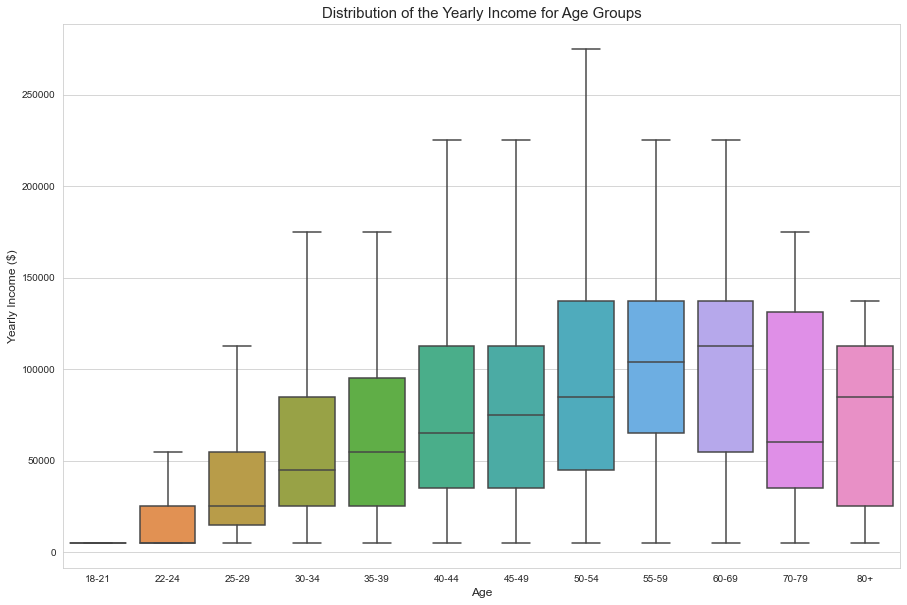

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q2', y='target', data=df_choice, order=order, showfliers=False)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Age", fontsize=12)
plt.title("Distribution of the Yearly Income for Age Groups", fontsize=15)
plt.show()

# Location 

In [31]:
print(question_names['Q3'])

In which country do you currently reside?


In [34]:
country_dic = {'Morocco': 'Africa',
             'Tunisia': 'Africa',
             'Austria': 'Europe',
             'Hong Kong (S.A.R.)': 'Asia',
             'Republic of Korea': 'Asia',
             'Thailand': 'Asia',
             'Czech Republic': 'Europe',
             'Philippines': 'Asia',
             'Romania': 'Europe',
             'Kenya': 'Africa',
             'Finland': 'Europe',
             'Norway': 'Europe',
             'Peru': 'South America',
             'Iran, Islamic Republic of...': 'Middle East',
             'Bangladesh': 'Asia',
             'New Zealand': 'Oceania',
             'Egypt': 'Africa',
             'Chile': 'South America',
             'Belarus': 'Europe',
             'Hungary': 'Europe',
             'Ireland': 'Europe',
             'Belgium': 'Europe',
             'Malaysia': 'Asia',
             'Denmark': 'Europe',
             'Greece': 'Europe',
             'Pakistan': 'Asia',
             'Viet Nam': 'Asia',
             'Argentina': 'South America',
             'Colombia': 'South America',
             'Indonesia': 'Oceania',
             'Portugal': 'Europe',
             'South Africa': 'Africa',
             'South Korea': 'Asia',
             'Switzerland': 'Europe',
             'Sweden': 'Europe',
             'Israel': 'Middle East',
             'Nigeria': 'Africa',
             'Singapore': 'Asia',
             'I do not wish to disclose my location': 'dna',
             'Mexico': 'North America',
             'Ukraine': 'Europe',
             'Netherlands': 'Europe',
             'Turkey': 'Asia',
             'Poland': 'Europe',
             'Australia': 'Oceania',
             'Italy': 'Europe',
             'Spain': 'Europe',
             'Japan': 'Asia',
             'France': 'Europe',
             'Canada': 'North America', 
             'United Kingdom of Great Britain and Northern Ireland': 'Europe',
             'Germany': 'Europe',
             'Brazil': 'South America',
             'Russia': 'Russia',
             'Other': 'Other',
             'China': 'China',
             'India': 'India',
             'United States of America': 'USA'}

## Salaries highly vary depending on the country you work in. Countries are grouped by continent / region, except for the five most represented ones (USA, India, China, Russia and Brazil) Asia excludes India, China and Russia; North America includes Canada and Mexico only; and that South America excludes Brazil.

In [35]:
df_choice['Q3'] = df_choice['Q3'].apply(lambda x: country_dic[x])

# Location Make Up

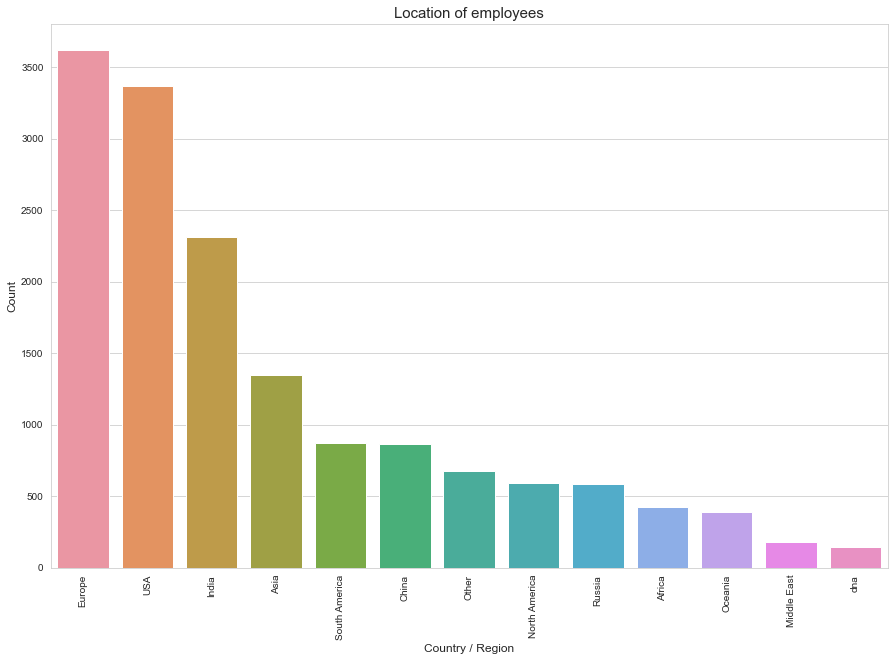

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(df_choice['Q3'], order=df_choice['Q3'].value_counts().index)
plt.xticks(rotation=-270)
plt.xlabel("Country / Region", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Location of employees", fontsize=15)
plt.show()

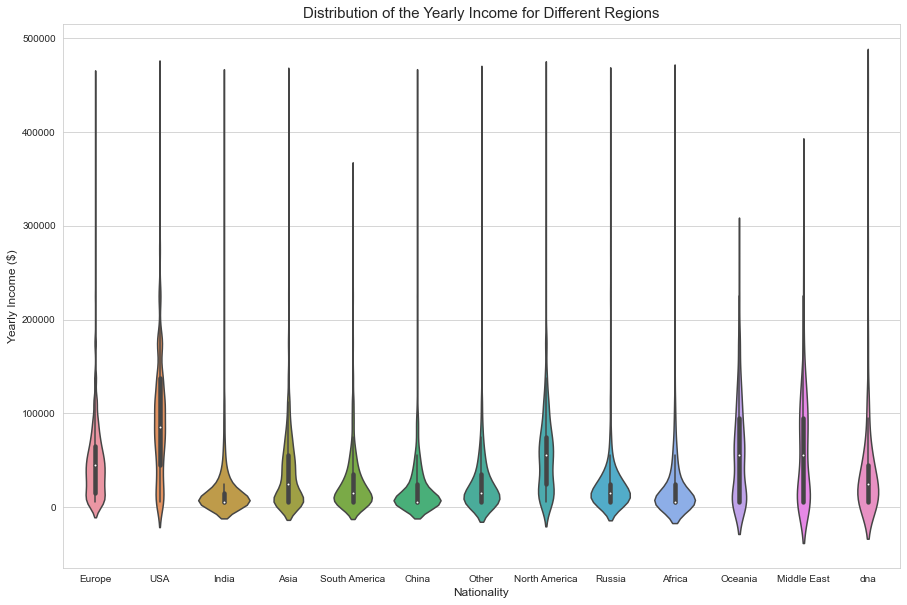

In [37]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q3', y='target', data=df_choice, order=df_choice['Q3'].value_counts().index)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Nationality", fontsize=12)
plt.title("Distribution of the Yearly Income for Different Regions", fontsize=15)
plt.show()

In [39]:
df = df_choice[df_choice['Q1'] != "Prefer not to say"]
df = df[df['Q1'] != "Prefer to self-describe"]

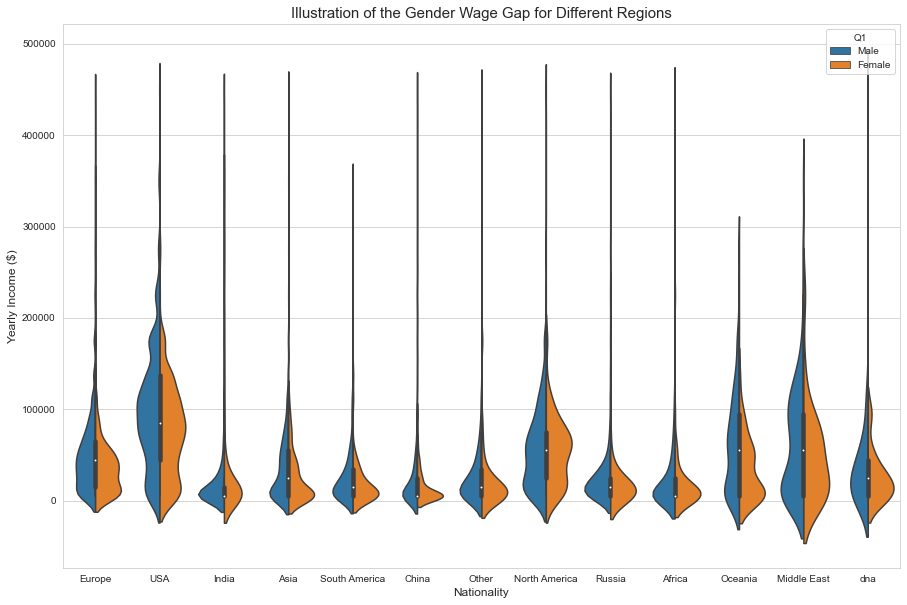

In [39]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q3', y='target', hue='Q1', data=df, split=True, order=df_choice['Q3'].value_counts().index)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Nationality", fontsize=12)
plt.title("Illustration of the Gender Wage Gap for Different Regions", fontsize=15)
plt.show()

# Education

In [40]:
print(question_names['Q4'])

What is the highest level of formal education that you have attained or plan to attain within the next 2 years?


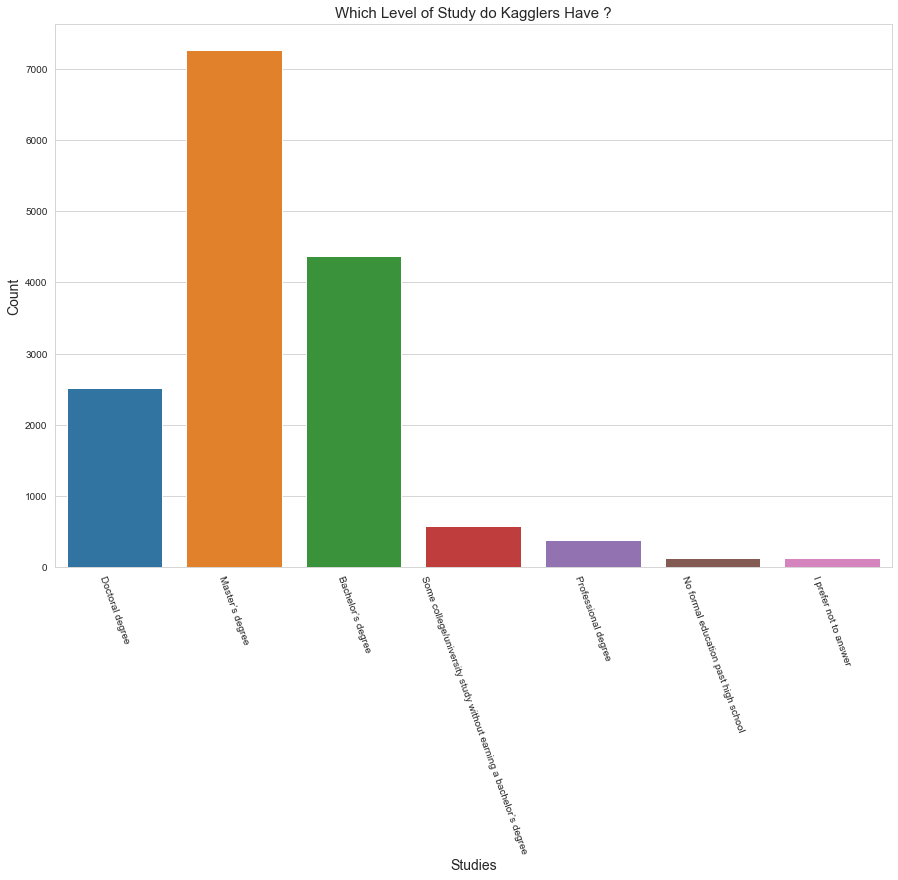

In [43]:
order = ['Doctoral degree', 'Master’s degree', 'Bachelor’s degree',  'Some college/university study without earning a bachelor’s degree',
         'Professional degree', 'No formal education past high school', 'I prefer not to answer']

plt.figure(figsize=(15,10))
sns.countplot(df_choice['Q4'], order=order)
plt.xticks(rotation=-70)
plt.xlabel("Studies", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Which Level of Study do Kagglers Have ?", fontsize=15)
plt.show()

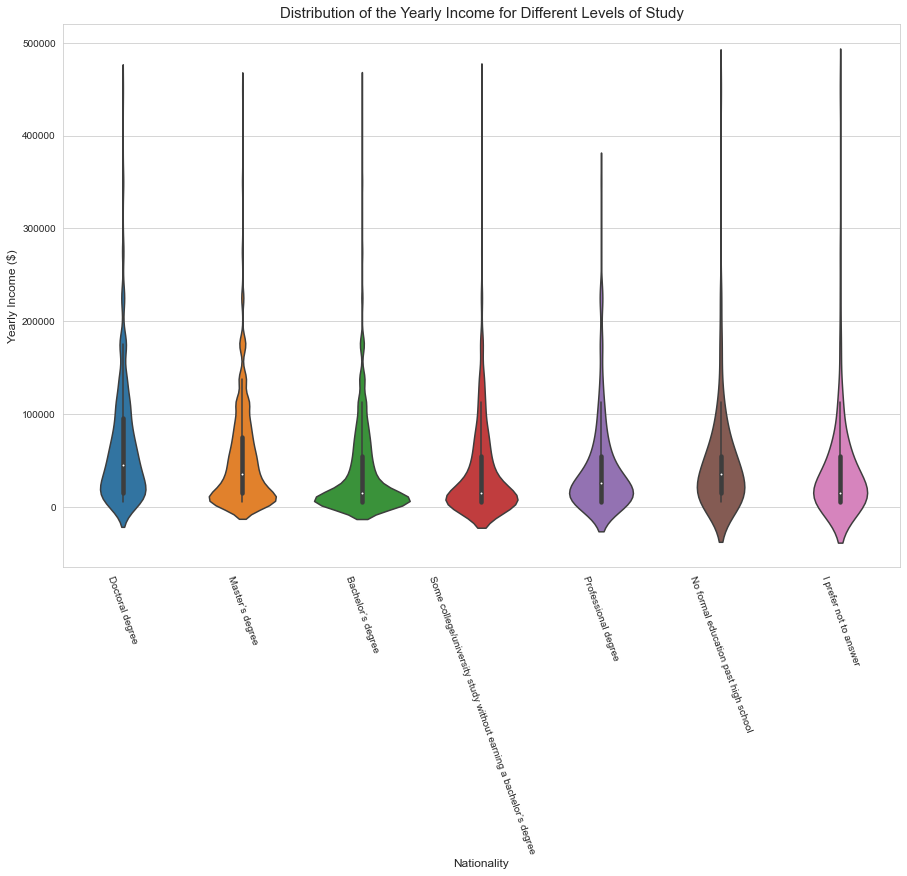

In [44]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q4', y='target', data=df_choice, order=order)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Nationality", fontsize=12)
plt.title("Distribution of the Yearly Income for Different Levels of Study", fontsize=15)
plt.show()

* This shows that the gender pay gap is not (only) caused by a difference of education in the USA, as there is differencies inside each type of studies.

* Furthermore, recent studies have shown that women tend to study more than men in the USA. 

In [10]:
df = df[df['Q3'] == 'USA']

plt.figure(figsize=(15,10))
sns.violinplot(x='Q4', y='target', hue='Q1', data=df, split=True, order=order)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Studies", fontsize=12)
plt.title("Illustration of the Gender Wage Gap for Different Levels of Education in the USA", fontsize=15)
plt.show()

NameError: name 'df' is not defined

In [47]:
print(question_names['Q5'])

Which best describes your undergraduate major? - Selected Choice


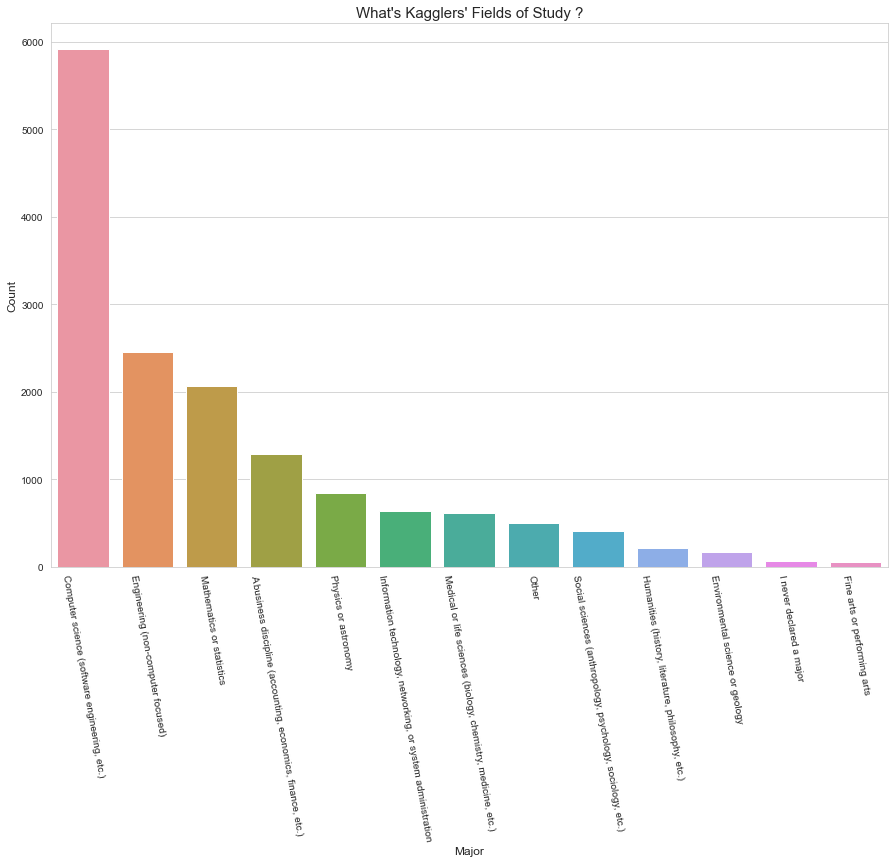

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(df_choice['Q5'], order=df_choice['Q5'].value_counts().index)
plt.xticks(rotation=-80)
plt.xlabel("Major", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("What's Kagglers' Fields of Study ?", fontsize=15)
plt.show()

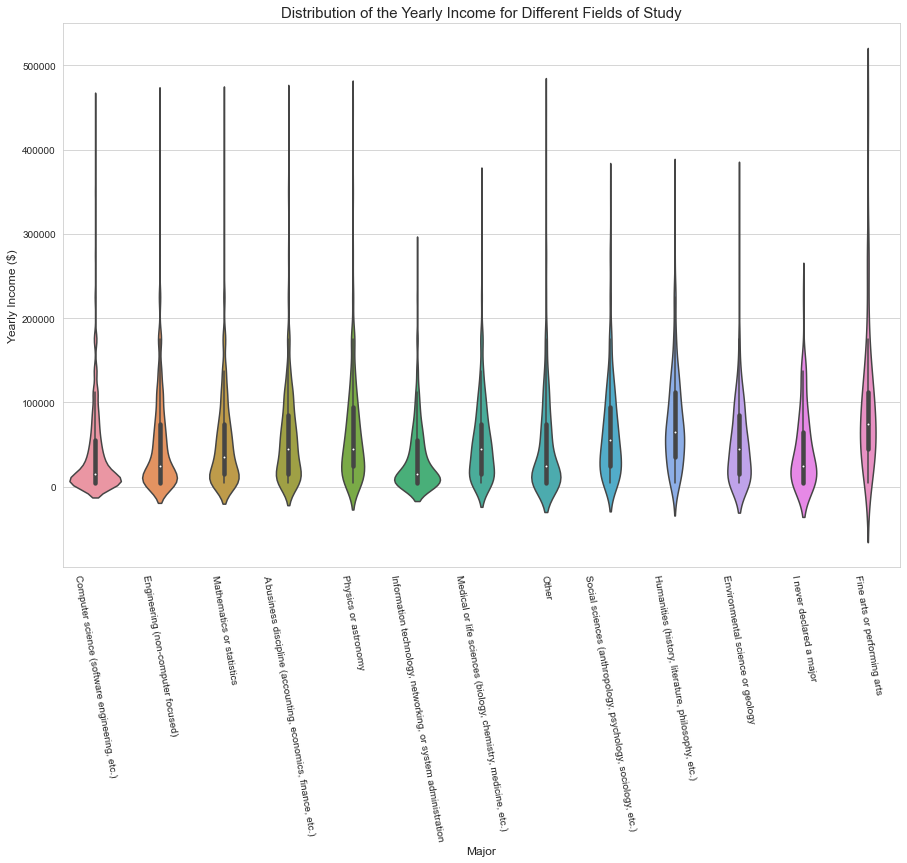

In [49]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q5', y='target', data=df_choice, order=df_choice['Q5'].value_counts().index)
plt.xticks(rotation=-80)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Major", fontsize=12)
plt.title("Distribution of the Yearly Income for Different Fields of Study", fontsize=15)
plt.show()

In [50]:
print(question_names['Q6'])

Select the title most similar to your current role (or most recent title if retired): - Selected Choice


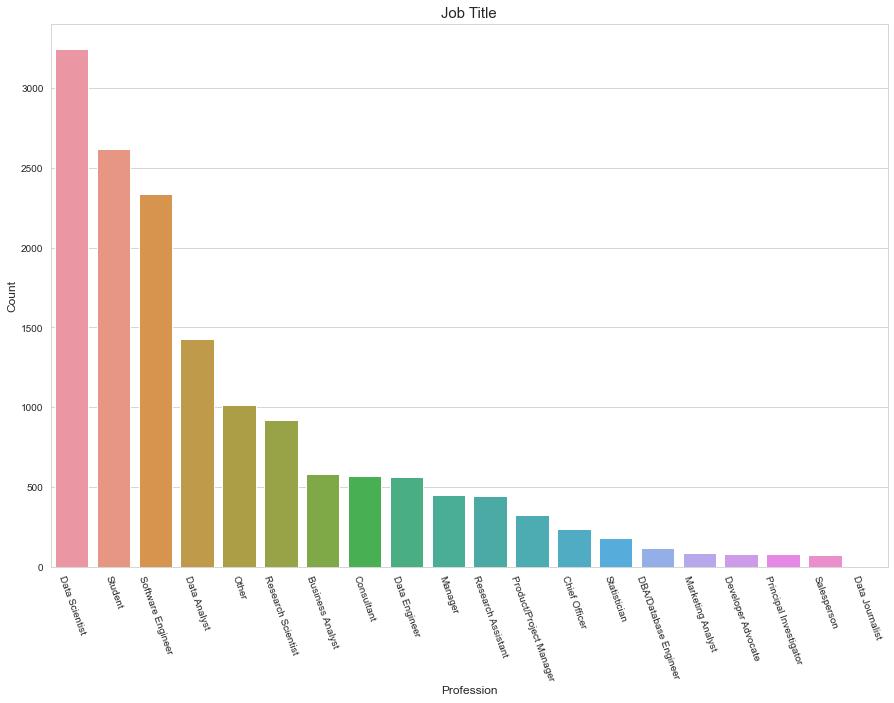

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(df_choice['Q6'], order=df_choice['Q6'].value_counts().index)
plt.xticks(rotation=-70)
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Job Title", fontsize=15)
plt.show()

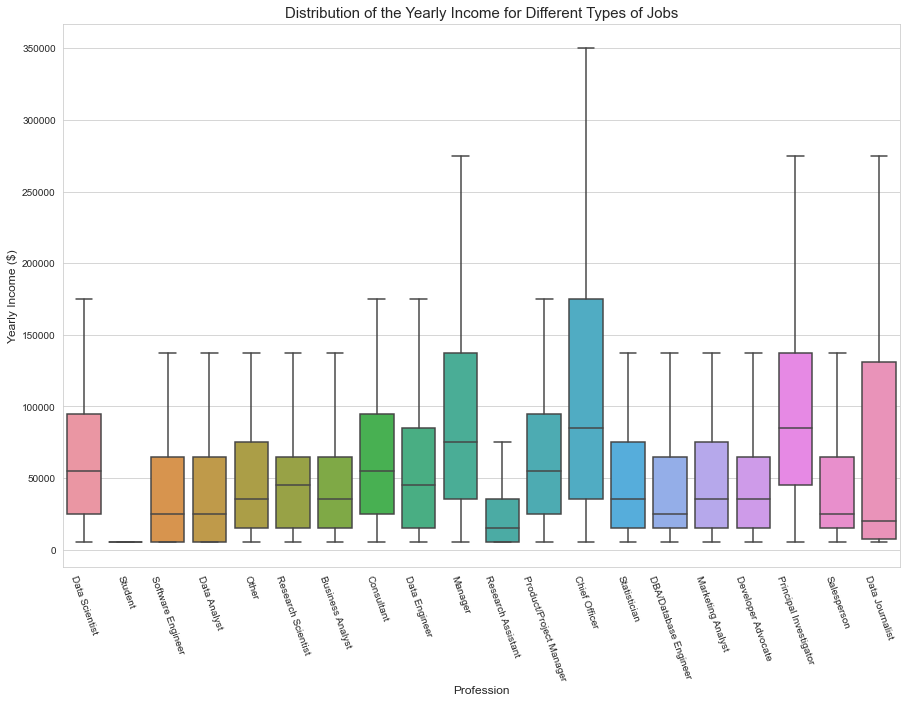

In [54]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q6', y='target', data=df_choice, order=df_choice['Q6'].value_counts().index, showfliers=False)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Profession", fontsize=12)
plt.title("Distribution of the Yearly Income for Different Types of Jobs", fontsize=15)
plt.show()

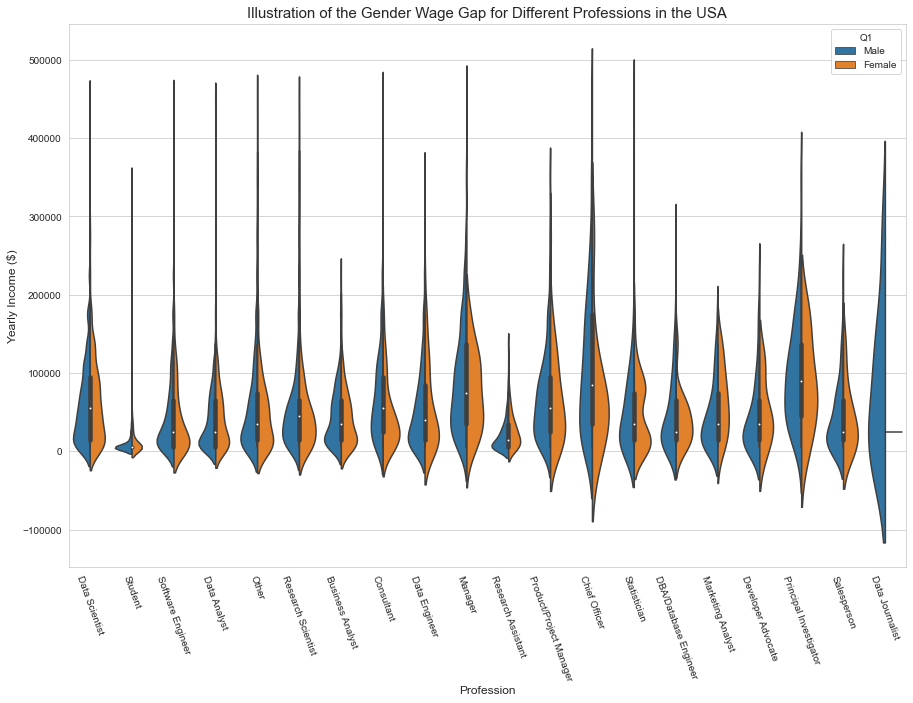

In [41]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q6', y='target', hue='Q1', data=df, split=True, order=df['Q6'].value_counts().index)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Profession", fontsize=12)
plt.title("Illustration of the Gender Wage Gap for Different Professions in the USA", fontsize=15)
plt.show()

# This shows that the gender pay gap is not (only) caused by a difference of education in the USA, as there is differencies inside each type of studies.

Furthermore, recent studies have shown that women tend to study more than men in the USA. This is not really the case here because women are under-represented. But the point I'm making is that the length of studies is not the cause of the pay gap.

# Major

In [40]:
print(question_names['Q5'])

Which best describes your undergraduate major? - Selected Choice


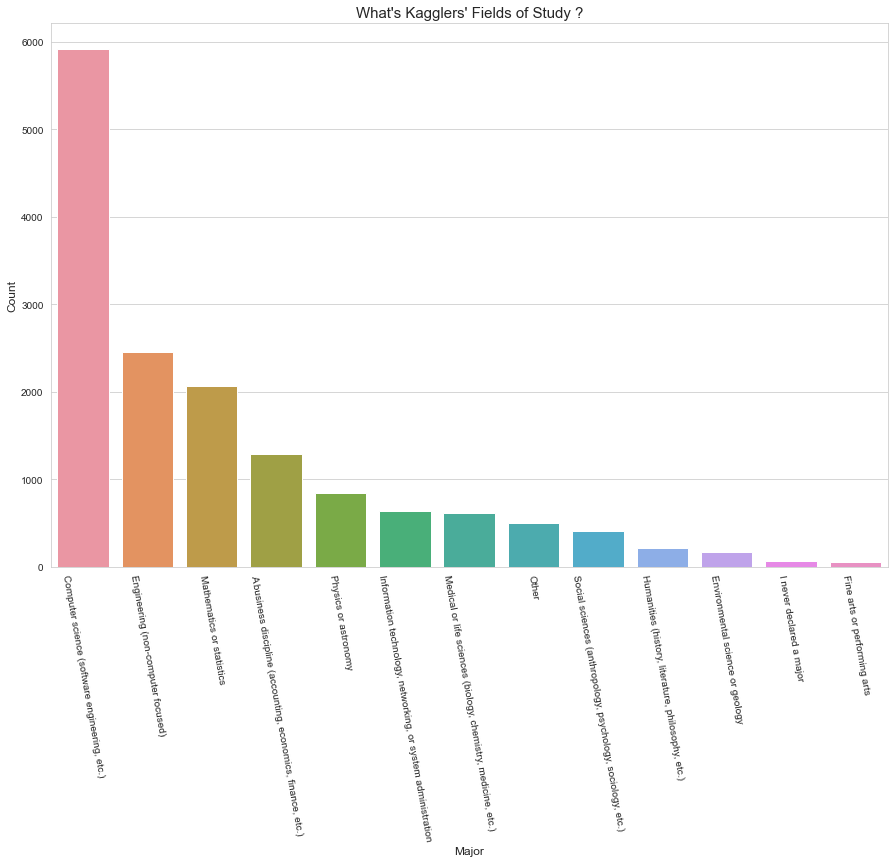

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(df_choice['Q5'], order=df_choice['Q5'].value_counts().index)
plt.xticks(rotation=-80)
plt.xlabel("Major", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("What's Kagglers' Fields of Study ?", fontsize=15)
plt.show()

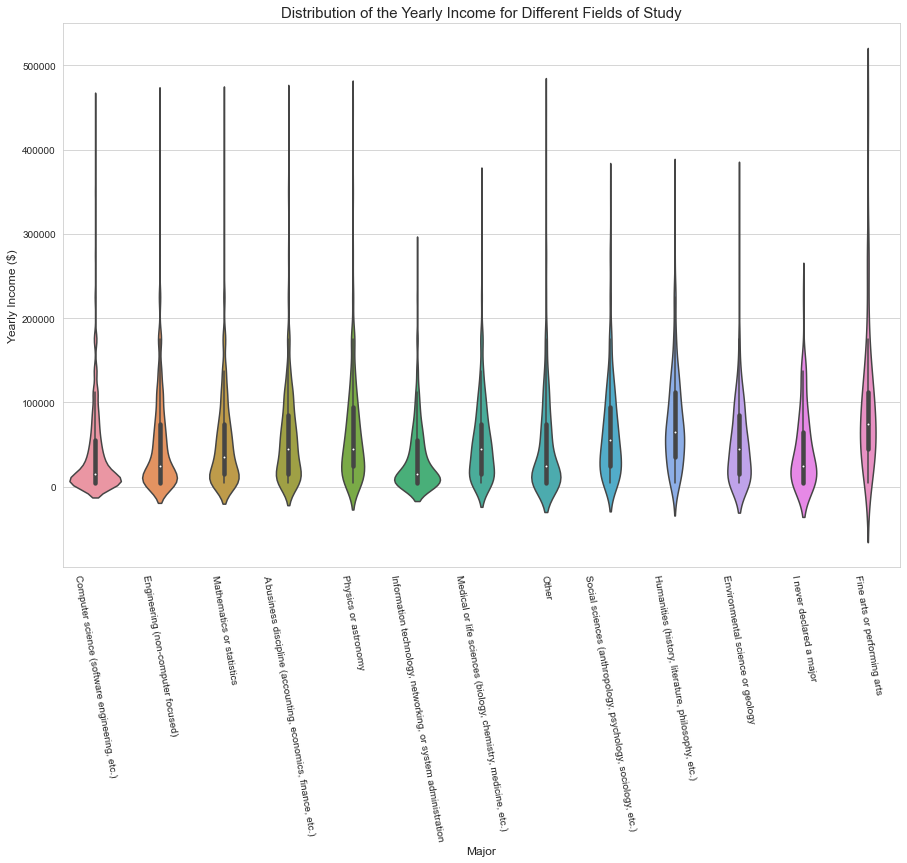

In [44]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q5', y='target', data=df_choice, order=df_choice['Q5'].value_counts().index)
plt.xticks(rotation=-80)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Major", fontsize=12)
plt.title("Distribution of the Yearly Income for Different Fields of Study", fontsize=15)
plt.show()

# Profession

In [46]:
print(question_names['Q6'])

Select the title most similar to your current role (or most recent title if retired): - Selected Choice


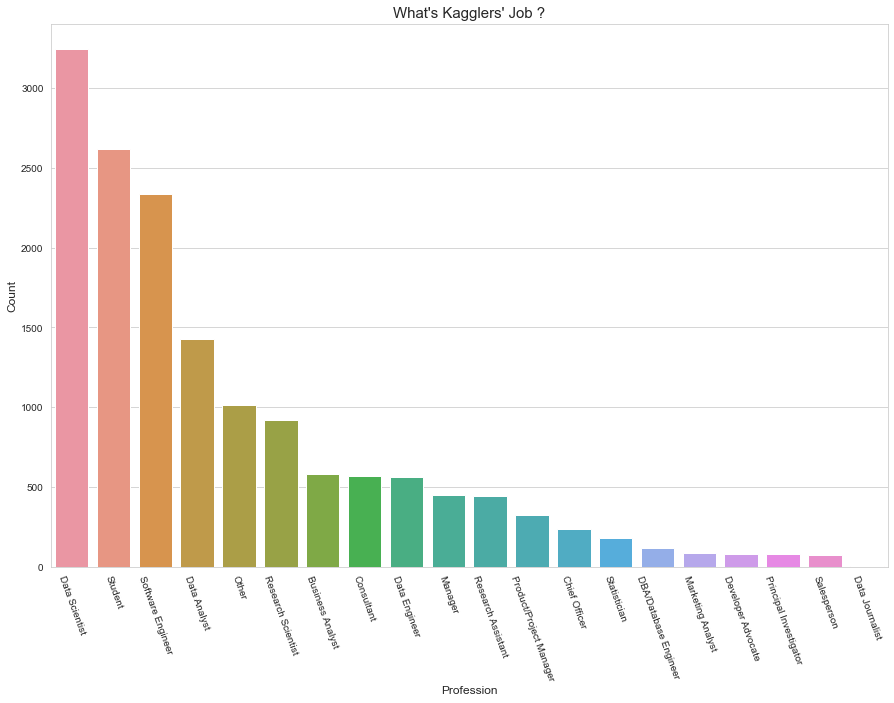

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(df_choice['Q6'], order=df_choice['Q6'].value_counts().index)
plt.xticks(rotation=-70)
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("What's Kagglers' Job ?", fontsize=15)
plt.show()

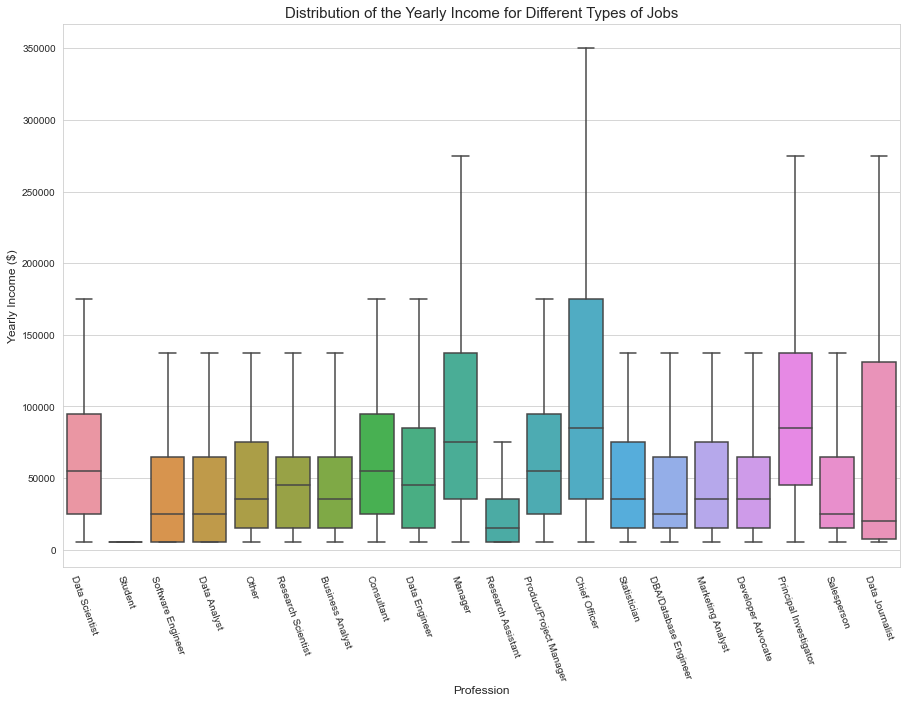

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q6', y='target', data=df_choice, order=df_choice['Q6'].value_counts().index, showfliers=False)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Profession", fontsize=12)
plt.title("Distribution of the Yearly Income for Different Types of Jobs", fontsize=15)
plt.show()

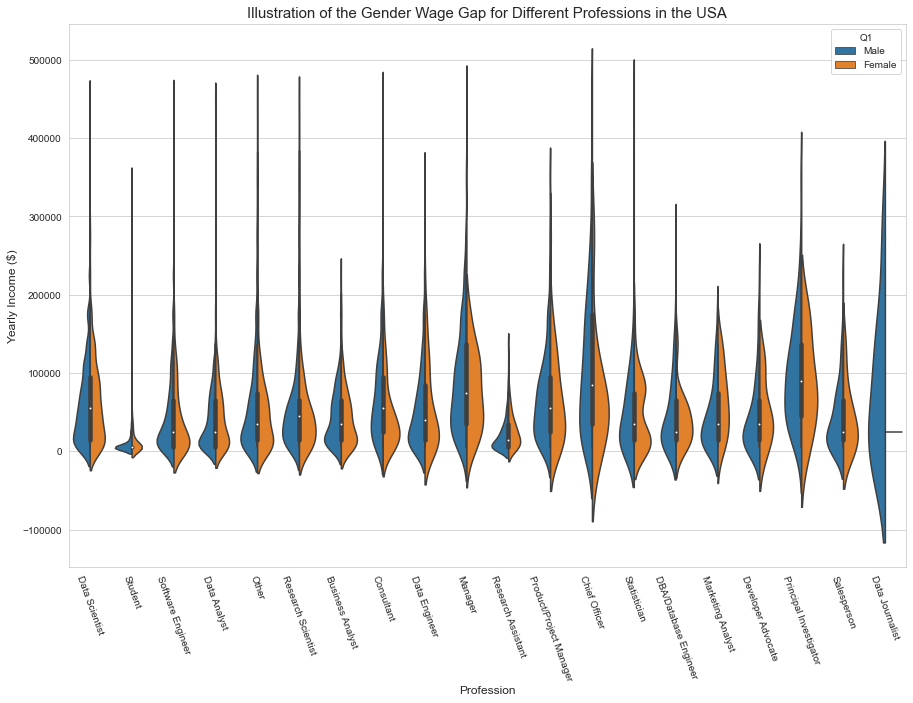

In [49]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q6', y='target', hue='Q1', data=df, split=True, order=df['Q6'].value_counts().index)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Profession", fontsize=12)
plt.title("Illustration of the Gender Wage Gap for Different Professions in the USA", fontsize=15)
plt.show()

# Inside a same job, the pay gap seems to be smaller. It is harder to directly come to a conclusion. Overall, men seem to gain more, but women do better as Chief Officer, and approximately as much as men in most jobs.

This and the previous graph leads us to think that men tend to occupy higher earning jobs. Let us verify this.

In [50]:
# Mean salary of each job
means = df.groupby(['Q6'])['target'].mean().sort_values(ascending=False)

# Women proportion of each job
d = {"Female":1, "Male":0}
df['Q1'] = df['Q1'].apply(lambda x: d[x])
women_perc = df.groupby(['Q6'])['Q1'].mean()

# Joining
df_job = pd.concat([means, women_perc], axis=1)

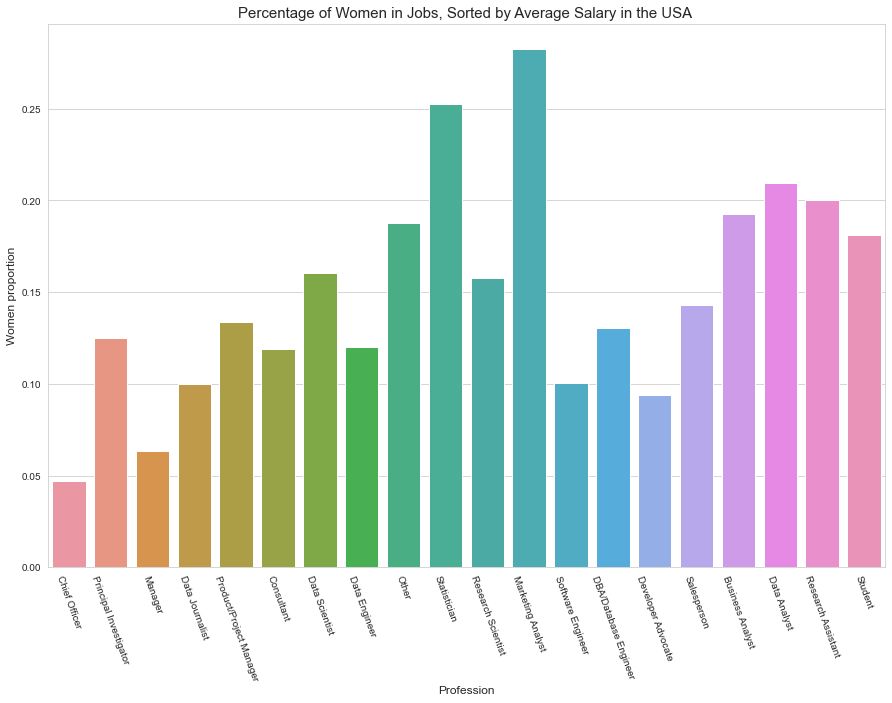

In [51]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_job.index, y='Q1', data=df_job, order=means.index)
plt.xticks(rotation=-70)
plt.ylabel("Women proportion", fontsize=12)
plt.xlabel("Profession", fontsize=12)
plt.title("Percentage of Women in Jobs, Sorted by Average Salary in the USA ", fontsize=15)
plt.show()

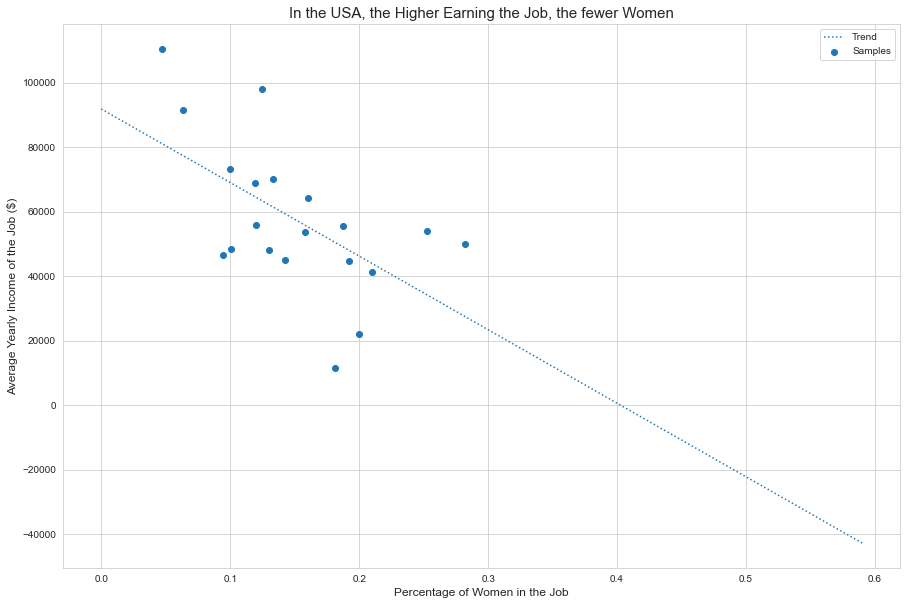

In [52]:
# Linear regression
z = np.polyfit(df_job['Q1'], df_job['target'], 1)
p = np.poly1d(z)

plt.figure(figsize=(15,10))
plt.scatter(df_job['Q1'], df_job['target'], label='Samples')
plt.plot(np.arange(0, 0.6, 0.01), p(np.arange(0, 0.6, 0.01)), linestyle=':', label='Trend')
plt.ylabel("Average Yearly Income of the Job ($)", fontsize=12)
plt.xlabel("Percentage of Women in the Job", fontsize=12)
plt.title("In the USA, the Higher Earning the Job, the fewer Women", fontsize=15)
plt.legend()
plt.show()

# Industry

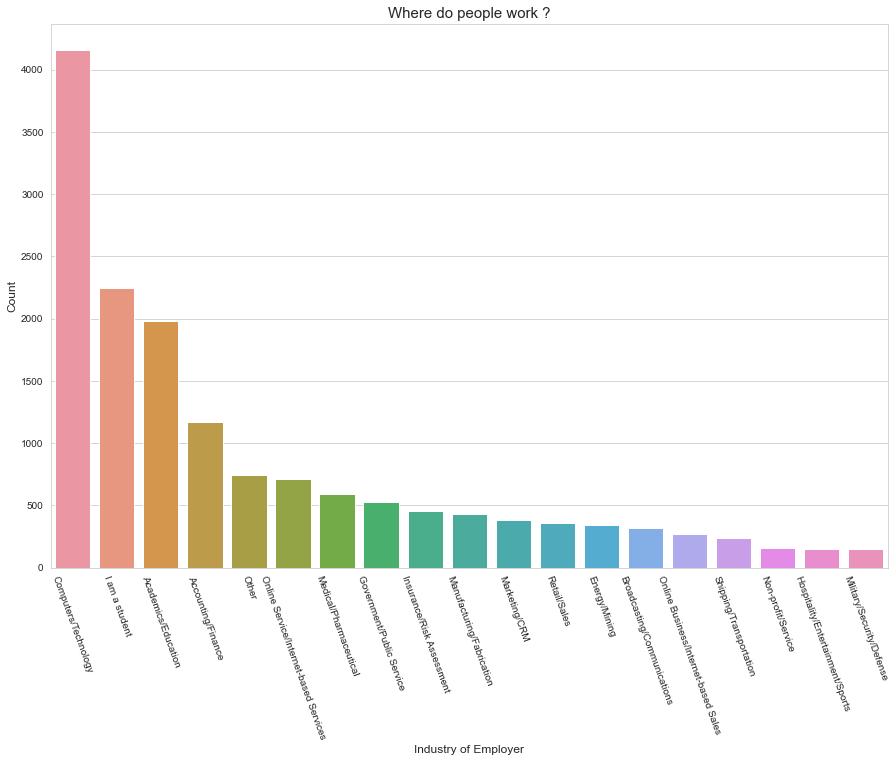

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(df_choice['Q7'], order=df_choice['Q7'].value_counts().index)
plt.xticks(rotation=-70)
plt.xlabel("Industry of Employer", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Where do people work ?", fontsize=15)
plt.show()

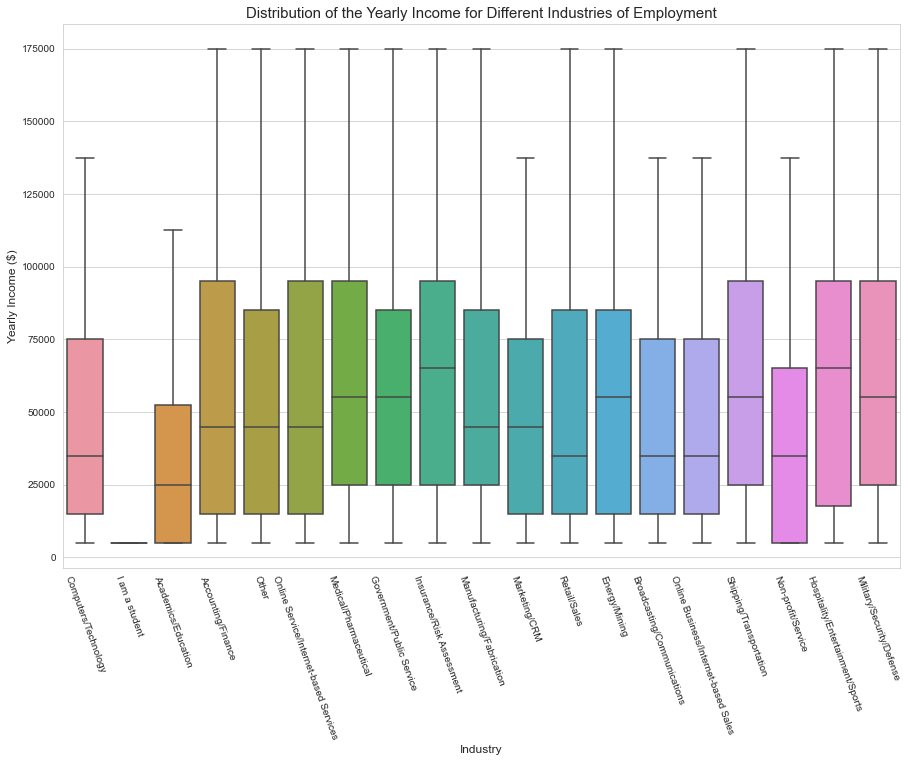

In [54]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q7', y='target', data=df_choice, order=df_choice['Q7'].value_counts().index, showfliers=False)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Industry", fontsize=12)
plt.title("Distribution of the Yearly Income for Different Industries of Employment", fontsize=15)
plt.show()

# The three categories that stand out are students (again, well they're not paid), Non-profit/Services and Academics/Education. Nothing incoherent, as those last two are paid by the state.

I was expecting more contrasted results, but a model can definitely learn something from this.

# Experience

In [55]:
question_names['Q8']

'How many years of experience do you have in your current role?'

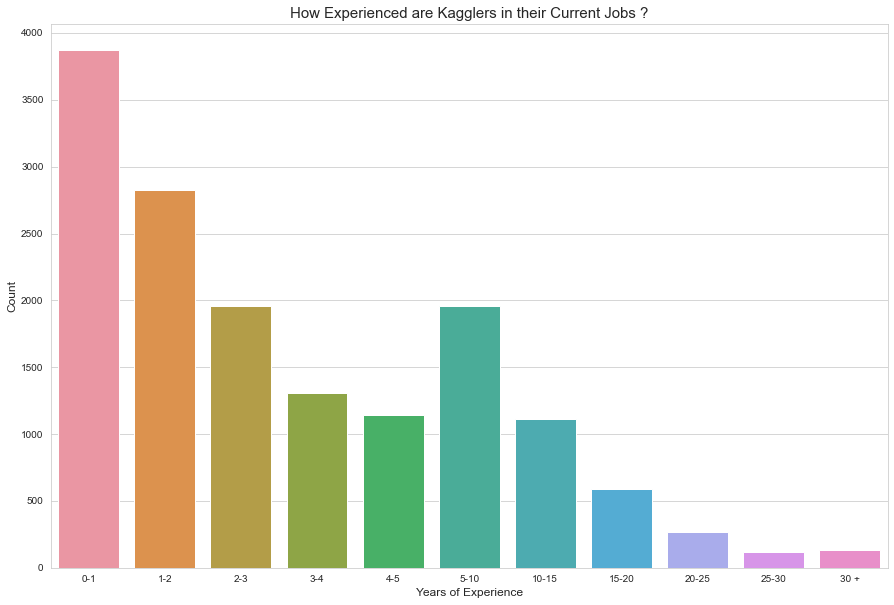

In [56]:
order = ['0-1', '1-2', '2-3',  '3-4', '4-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30 +']

plt.figure(figsize=(15,10))
sns.countplot(df_choice['Q8'], order=order)
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("How Experienced are Kagglers in their Current Jobs ?", fontsize=15)
plt.show()

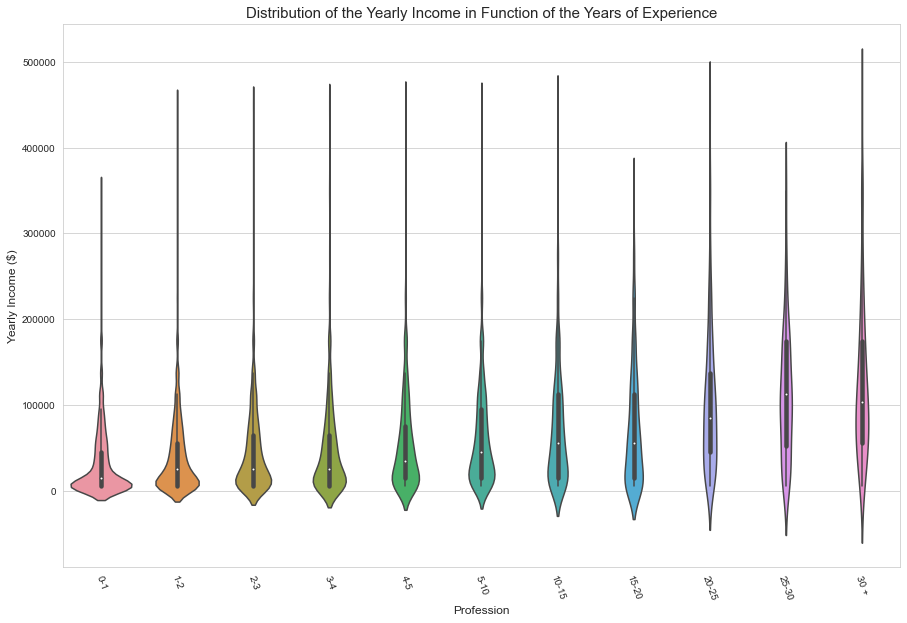

In [57]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q8', y='target', data=df_choice, order=order)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Profession", fontsize=12)
plt.title("Distribution of the Yearly Income in Function of the Years of Experience", fontsize=15)
plt.show()

# Once again, logical results. The salary is a strictly increasing function of your experience in the job

# Importing Swedish data

In [60]:
import warnings
import itertools
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style('whitegrid')

In [179]:
df_Sweden = pd.read_csv('C:\\Users\\Dawn\\OneDrive\\Data Analytics Work\\Capstone Project 2\\swedishdata3.csv', encoding='ISO-8859-1')

In [180]:
df_Sweden.head()

,ï»¿Occupation,Gender,level of education,Wage
0,0110 Commissioned armed forces officers,men,All educational levels,..
1,0110 Commissioned armed forces officers,men,primary and secondary education less than 9 ye...,..
2,0110 Commissioned armed forces officers,men,primary and secondary education 9-10 years (IS...,..
3,0110 Commissioned armed forces officers,men,"upper secondary education, 2 years or less (IS...",..
4,0110 Commissioned armed forces officers,men,upper secondary education 3 years (ISCED97 3A),..


In [181]:
print("Number employees listed :", df_Sweden.shape[0])

Number employees listed : 11637


In [182]:
print(df_Sweden['Gender'].unique())

['men' 'women' 'total']


In [183]:
df_Sweden = df_Sweden[df_Sweden['Gender'].notnull()]
df_Sweden = df_Sweden[df_Sweden['Gender'] != 'total']

In [184]:
print(df_Sweden.shape[0], "replies left")

7758 replies left


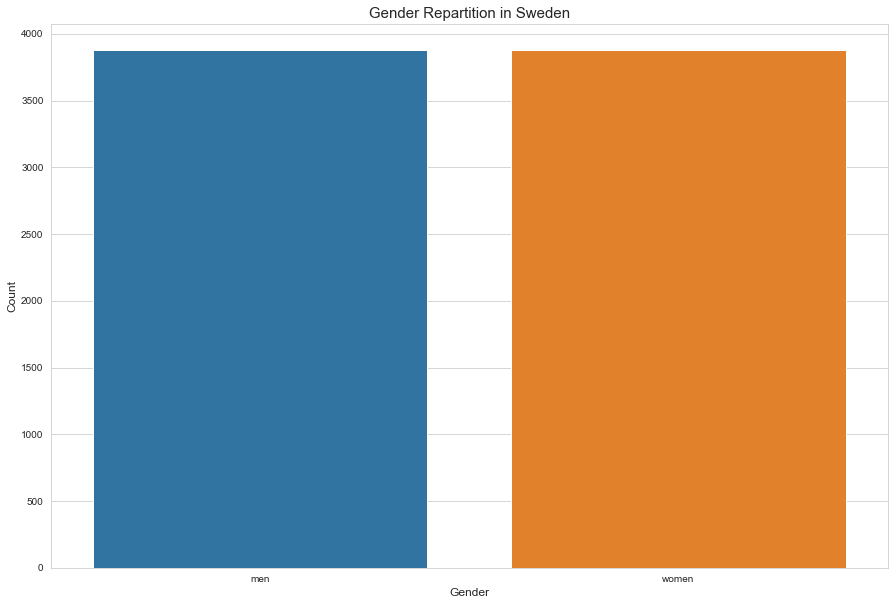

In [185]:
plt.figure(figsize=(15,10))
sns.countplot(df_Sweden['Gender'])
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Gender Repartition in Sweden", fontsize=15)
plt.show()
plt.show()

In [186]:
df_Sweden = df_Sweden[df_Sweden['Wage'].notnull()]
df_Sweden = df_Sweden[df_Sweden['Wage'] != '..']

# Removing blanks and unavailable data cells(..)

In [187]:
print(df_Sweden.shape[0], "replies left")

2844 replies left


In [188]:
df_Sweden = df_Sweden[df_Sweden['level of education'].notnull()]
df_Sweden = df_Sweden[df_Sweden['level of education'] != 'All educational levels']

In [189]:
print(df_Sweden.shape[0], "replies left after totals removed from wage and education")

2125 replies left after totals removed from wage and education


In [190]:
df_Sweden['Wage'] = df_Sweden['Wage'].apply(pd.to_numeric)

In [191]:
df_Sweden['Exchange_rate'] = .12*12

In [192]:
df_Sweden['Yearly Wage in $USD'] = df_Sweden['Wage'] * df_Sweden['Exchange_rate']

In [193]:
df_Sweden.head()

,ï»¿Occupation,Gender,level of education,Wage,Exchange_rate,Yearly Wage in $USD
114,1112 Senior government officials,men,post-secondary education 3 years or more (ISCE...,90800,1.44,130752.0
123,1112 Senior government officials,women,post-secondary education 3 years or more (ISCE...,91600,1.44,131904.0
165,1120 Directors and chief executives,men,"upper secondary education, 2 years or less (IS...",54200,1.44,78048.0
166,1120 Directors and chief executives,men,upper secondary education 3 years (ISCED97 3A),62700,1.44,90288.0
168,1120 Directors and chief executives,men,post-secondary education 3 years or more (ISCE...,92000,1.44,132480.0


In [160]:
print(df_Sweden)

                                           ï»¿Occupation Gender  \
114                     1112 Senior government officials    men   
123                     1112 Senior government officials  women   
165                  1120 Directors and chief executives    men   
166                  1120 Directors and chief executives    men   
168                  1120 Directors and chief executives    men   
...                                                  ...    ...   
11568  9629 Other service workers not elsewhere class...  women   
11569  9629 Other service workers not elsewhere class...  women   
11570  9629 Other service workers not elsewhere class...  women   
11571  9629 Other service workers not elsewhere class...  women   
11573  9629 Other service workers not elsewhere class...  women   

                                      level of education   Wage  \
114    post-secondary education 3 years or more (ISCE...  90800   
123    post-secondary education 3 years or more (ISCE...  916

In [194]:
df_Sweden['Wage Repartition'] = df_Sweden.groupby(pd.cut(df_Sweden['Yearly Wage in $USD'], np.arange([10-20,000.0, 0-10,000.0, 20-30,000.0, 125-150,000.0, 30-40,000.0, 50-60,000.0, 100-125,000.0, 90-100,000.0, 70-80,000.0, 80-90,000.0, 60-70,000.0, 400-500,000.0, 40-50,000.0, 150-200,000.0, 500,000.0+, 300-400,000.0, 200-250,000.0,250-300,000.0]))).sum()

SyntaxError: invalid syntax (<ipython-input-194-d02c8904e73b>, line 1)

In [171]:
#Group by two keys and then summarize each group
df_Sweden['Gender Salary Mean'] =  df_Sweden.groupby(['GENDER'],as_index=False).df_Sweden['Yearly Wage in $USD'.mean()
print(df_Sweden['Gender Salary Mean'])

SyntaxError: invalid syntax (<ipython-input-171-970c4b32b11e>, line 3)